In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("/home/rsingla1/project_data_latest.csv")

In [6]:
# Creating performance levels 0,1,2 and 3 based on games won in the playoffs and creating two datafames df1 containing input variables
#and df2 containing output performance
bins=[-1,2,6,10,11]
group_names=['0','1','2','3']
df1['performance']=pd.cut(df1['playoff_wins'],bins,labels=group_names)
df2=df1[["performance"]]


,performance
0,3
1,0
2,1
3,2
4,0
5,0
6,0
7,1
8,2
9,1


In [7]:
df1.columns

Index(['year', 'Tm', 'playoff_wins', 'world_series_ind', 'round', 'hit_numBat',
       'hit_BatAge', 'hit_RG', 'hit_G', 'hit_PA', 'hit_AB', 'hit_R_scored',
       'hit_H', 'hit_2B', 'hit_3B', 'hit_HR', 'hit_RBI', 'hit_SB', 'hit_CS',
       'hit_BB', 'hit_SO', 'hit_BA', 'hit_OBP', 'hit_SLG', 'hit_OPS',
       'hit_OPS+', 'hit_TB', 'hit_GDP', 'hit_HBP', 'hit_SH', 'hit_SF',
       'hit_IBB', 'hit_LOB', 'pitch_numP', 'pitch_PAge', 'pitch_RAG',
       'pitch_W', 'pitch_L', 'pitch_WL', 'pitch_ERA', 'pitch_G', 'pitch_GS',
       'pitch_GF', 'pitch_CG', 'pitch_tSho', 'pitch_cSho', 'pitch_SV',
       'pitch_IP', 'pitch_H', 'pitch_R_allowed', 'pitch_ER', 'pitch_HR',
       'pitch_BB', 'pitch_IBB', 'pitch_SO', 'pitch_HBP', 'pitch_BK',
       'pitch_WP', 'pitch_BF', 'pitch_ERAplus', 'pitch_FIP', 'pitch_WHIP',
       'pitch_H9', 'pitch_HR9', 'pitch_BB9', 'pitch_SO9', 'pitch_SOW',
       'pitch_LOB', 'performance'],
      dtype='object')

In [8]:
# Removing unwanted columns from input variables
df1.drop(["round","playoff_wins","performance","Tm","world_series_ind"],axis=1,inplace=True)

In [9]:
#use linear regression as the model for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
name=df1.columns.values
name
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(df1,df2)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_),name)))

Features sorted by their rank:
[(1, 'hit_OBP'), (2, 'hit_OPS'), (3, 'hit_SLG'), (4, 'hit_BA'), (5, 'pitch_WHIP'), (6, 'pitch_BB9'), (7, 'pitch_H9'), (8, 'pitch_HR9'), (9, 'pitch_FIP'), (10, 'pitch_WL'), (11, 'hit_RG'), (12, 'pitch_ERA'), (13, 'pitch_SOW'), (14, 'pitch_SO9'), (15, 'pitch_W'), (16, 'pitch_GS'), (17, 'pitch_G'), (18, 'hit_G'), (19, 'pitch_RAG'), (20, 'pitch_PAge'), (21, 'pitch_CG'), (22, 'pitch_GF'), (23, 'hit_BatAge'), (24, 'pitch_ER'), (25, 'pitch_H'), (26, 'pitch_BB'), (27, 'pitch_IP'), (28, 'pitch_cSho'), (29, 'pitch_BK'), (30, 'hit_H'), (31, 'hit_AB'), (32, 'hit_SF'), (33, 'hit_SH'), (34, 'hit_PA'), (35, 'pitch_L'), (36, 'pitch_SO'), (37, 'hit_LOB'), (38, 'pitch_LOB'), (39, 'pitch_BF'), (40, 'pitch_R_allowed'), (41, 'hit_TB'), (42, 'hit_RBI'), (43, 'pitch_tSho'), (44, 'hit_HR'), (45, 'pitch_numP'), (46, 'hit_BB'), (47, 'hit_HBP'), (48, 'hit_GDP'), (49, 'year'), (50, 'hit_CS'), (51, 'pitch_WP'), (52, 'pitch_HBP'), (53, 'hit_R_scored'), (54, 'hit_2B'), (55, 'pitch_HR')

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Feature Selection using Extra Tree Classifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df1,df2)
#y=k_scores.append(x.mean())
# display the relative importance of each attribute
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_),name), 
             reverse=True))

[(0.027300000000000001, 'hit_BatAge'), (0.026800000000000001, 'hit_3B'), (0.0253, 'pitch_H9'), (0.025100000000000001, 'pitch_WP'), (0.024899999999999999, 'hit_SH'), (0.0246, 'pitch_W'), (0.024, 'hit_BA'), (0.023900000000000001, 'hit_LOB'), (0.022599999999999999, 'pitch_PAge'), (0.022499999999999999, 'pitch_HBP'), (0.022499999999999999, 'hit_TB'), (0.0224, 'hit_2B'), (0.020899999999999998, 'hit_BB'), (0.0201, 'pitch_SOW'), (0.019599999999999999, 'pitch_tSho'), (0.0189, 'pitch_WHIP'), (0.0184, 'hit_GDP'), (0.018100000000000002, 'pitch_CG'), (0.017899999999999999, 'pitch_R_allowed'), (0.017600000000000001, 'pitch_IBB'), (0.017600000000000001, 'hit_IBB'), (0.017500000000000002, 'pitch_SV'), (0.0172, 'pitch_BK'), (0.017000000000000001, 'hit_OPS+'), (0.016799999999999999, 'pitch_BB'), (0.016400000000000001, 'pitch_numP'), (0.016400000000000001, 'pitch_H'), (0.016299999999999999, 'hit_HBP'), (0.0161, 'pitch_ERA'), (0.0161, 'hit_HR'), (0.015900000000000001, 'pitch_ERAplus'), (0.015699999999999

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [11]:
#Feature selection using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor()
rf.fit(df1, df2)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), name), 
             reverse=True))

Features sorted by their score:
[(0.077200000000000005, 'pitch_HBP'), (0.061400000000000003, 'pitch_PAge'), (0.059400000000000001, 'hit_BB'), (0.0511, 'hit_3B'), (0.039399999999999998, 'pitch_WP'), (0.039100000000000003, 'pitch_IBB'), (0.039100000000000003, 'hit_BatAge'), (0.037499999999999999, 'hit_CS'), (0.033700000000000001, 'hit_SO'), (0.030099999999999998, 'pitch_ER'), (0.0293, 'pitch_WHIP'), (0.027400000000000001, 'pitch_SV'), (0.0218, 'hit_SH'), (0.020199999999999999, 'pitch_IP'), (0.020199999999999999, 'pitch_ERAplus'), (0.02, 'hit_R_scored'), (0.019199999999999998, 'hit_SB'), (0.0189, 'pitch_H'), (0.018499999999999999, 'pitch_HR'), (0.017899999999999999, 'pitch_H9'), (0.0178, 'pitch_W'), (0.017500000000000002, 'pitch_FIP'), (0.0154, 'hit_IBB'), (0.0147, 'hit_HR'), (0.0143, 'hit_SLG'), (0.012800000000000001, 'pitch_BF'), (0.012200000000000001, 'pitch_SO'), (0.0117, 'hit_H'), (0.0114, 'hit_OPS+'), (0.0111, 'pitch_WL'), (0.010699999999999999, 'pitch_BK'), (0.0104, 'pitch_SO9'), (

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [17]:
#Using top 29 columns based on Linear Regression Model(Recursive Feature Elimination) to predict the
#performance of different teams 
# Dividing data into test and train 
columns=['hit_OBP','hit_OPS','hit_SLG','hit_BA','pitch_WHIP','pitch_BB9','pitch_H9','pitch_HR9','pitch_FIP','pitch_WL',
         'hit_RG','pitch_ERA','pitch_SOW','pitch_SO9','pitch_W','pitch_GS','pitch_G','hit_G','pitch_RAG','pitch_PAge',
         'pitch_CG','pitch_GF','hit_BatAge','pitch_ER','pitch_H','pitch_BB','pitch_IP','pitch_cSho','pitch_BK']
features=df1[list(columns)]
x_train,x_test=features[:167],features[167:]
y_train,y_test=df2[:167],df2[167:]
y_test

,performance
167,0
168,3
169,2
170,1
171,0
172,0
173,1
174,0


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/lib64/python3.4/site-packages/sklearn/externals/joblib/parallel.py:131: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


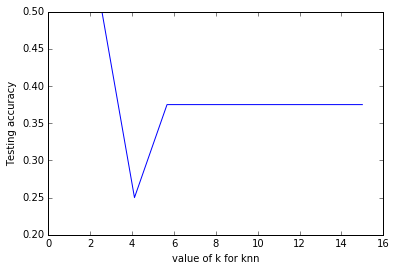

In [14]:
#Plotting graph between k-nearest neighbor and accuracy
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k_range=np.linspace(start=1,stop=15, num=10)

scores=[]
for k in k_range:

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('Testing accuracy')

In [23]:
### Applying knn model on fist 29 features features to predict performance of different teams for year 2016
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test, y_pred, average='macro'))
print(metrics.f1_score(y_test, y_pred, average='macro'))
print(y_test)
print(y_pred)

0.5
0.125
0.25
0.166666666667
    performance
167           0
168           3
169           2
170           1
171           0
172           0
173           1
174           0
['0' '0' '0' '0' '0' '0' '0' '0']


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
#Applying Logistic Regression on same x_train,y_train,x_test and y_test
from pandas import *    
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average='macro'))
print(metrics.recall_score(y_test, y_pred, average='macro'))
print(metrics.f1_score(y_test, y_pred, average='macro'))
print(y_test)
print(y_pred)

0.625
0.525
0.5625
0.541666666667
    performance
167           0
168           3
169           2
170           1
171           0
172           0
173           1
174           0
['1' '3' '0' '1' '0' '0' '0' '0']


/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
